<a href="https://colab.research.google.com/github/HenriqueCCdA/EstudoDoFEniCS/blob/main/Notebooks/ft01_poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando o FeniCS

In [ ]:
# FEniCS
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

#Importando

In [4]:
from fenics import *

# Motando o problema

In [5]:
# Criando a melha
mesh = UnitSquareMesh(8, 8)

In [9]:
# Definindo funcoes de espaco
V = FunctionSpace(mesh, 'P', 1)

Calling FFC just-in-time (JIT) compiler, this may take some time.


In [12]:
# Definindo condicoes de contorno
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

In [24]:
# Definindo o problema variacional

u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

In [25]:
# Calculo da solucao
u = Function(V)
solve(a == L, u, bc)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


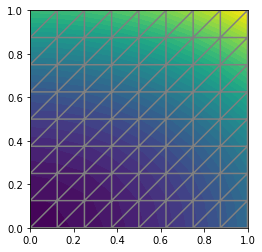

In [28]:
# Plota a solucao e a malha

plot(u)
plot(mesh)

In [30]:
vtkfile = File('poisson/solution.pvd')
vtkfile << u

In [31]:
# Calcula o erro da norma L2

error_L2 = errornorm(u_D, u, 'L2')

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


In [39]:
# Calcula o erro maximo nos vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)
import numpy as np
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

In [41]:
print(f'erro_L2  = {error_L2}')
print(f'erro_max = {error_max}')

erro_L2  = 0.00823509807335475
erro_max = 1.3322676295501878e-15


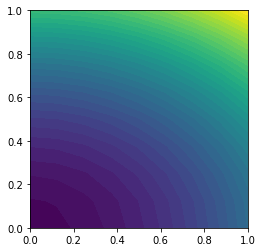

In [43]:
# Hold plot
import matplotlib.pyplot as plt
plot(u)
plt.show()

In [35]:
vertex_values_u_D

array([1.      , 1.015625, 1.0625  , 1.140625, 1.25    , 1.390625,
       1.5625  , 1.765625, 2.      , 1.03125 , 1.046875, 1.09375 ,
       1.171875, 1.28125 , 1.421875, 1.59375 , 1.796875, 2.03125 ,
       1.125   , 1.140625, 1.1875  , 1.265625, 1.375   , 1.515625,
       1.6875  , 1.890625, 2.125   , 1.28125 , 1.296875, 1.34375 ,
       1.421875, 1.53125 , 1.671875, 1.84375 , 2.046875, 2.28125 ,
       1.5     , 1.515625, 1.5625  , 1.640625, 1.75    , 1.890625,
       2.0625  , 2.265625, 2.5     , 1.78125 , 1.796875, 1.84375 ,
       1.921875, 2.03125 , 2.171875, 2.34375 , 2.546875, 2.78125 ,
       2.125   , 2.140625, 2.1875  , 2.265625, 2.375   , 2.515625,
       2.6875  , 2.890625, 3.125   , 2.53125 , 2.546875, 2.59375 ,
       2.671875, 2.78125 , 2.921875, 3.09375 , 3.296875, 3.53125 ,
       3.      , 3.015625, 3.0625  , 3.140625, 3.25    , 3.390625,
       3.5625  , 3.765625, 4.      ])

In [38]:
vertex_values_u

array([1.      , 1.015625, 1.0625  , 1.140625, 1.25    , 1.390625,
       1.5625  , 1.765625, 2.      , 1.03125 , 1.046875, 1.09375 ,
       1.171875, 1.28125 , 1.421875, 1.59375 , 1.796875, 2.03125 ,
       1.125   , 1.140625, 1.1875  , 1.265625, 1.375   , 1.515625,
       1.6875  , 1.890625, 2.125   , 1.28125 , 1.296875, 1.34375 ,
       1.421875, 1.53125 , 1.671875, 1.84375 , 2.046875, 2.28125 ,
       1.5     , 1.515625, 1.5625  , 1.640625, 1.75    , 1.890625,
       2.0625  , 2.265625, 2.5     , 1.78125 , 1.796875, 1.84375 ,
       1.921875, 2.03125 , 2.171875, 2.34375 , 2.546875, 2.78125 ,
       2.125   , 2.140625, 2.1875  , 2.265625, 2.375   , 2.515625,
       2.6875  , 2.890625, 3.125   , 2.53125 , 2.546875, 2.59375 ,
       2.671875, 2.78125 , 2.921875, 3.09375 , 3.296875, 3.53125 ,
       3.      , 3.015625, 3.0625  , 3.140625, 3.25    , 3.390625,
       3.5625  , 3.765625, 4.      ])